In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots

import wordcloud, missingno
from wordcloud import WordCloud
import missingno as mso
import networkx as nx

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AmazonBooks2009_20.csv to AmazonBooks2009_20.csv


In [4]:
df = pd.read_csv("AmazonBooks2009_20.csv")

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.shape

(600, 7)

In [7]:
df.isnull().sum()

,0
Name,0
Author,0
User Rating,0
Reviews,0
Price,0
Year,0
Genre,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Author       600 non-null    object 
 2   User Rating  600 non-null    float64
 3   Reviews      600 non-null    int64  
 4   Price        600 non-null    int64  
 5   Year         600 non-null    int64  
 6   Genre        600 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 32.9+ KB


In [9]:
#sort data according to the reviews, ascendog order, print the top 10
df.sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
552,Where the Crawdads Sing,Delia Owens,4.8,120727,9,2020,Fiction
563,Becoming,Michelle Obama,4.8,99498,10,2020,Non Fiction
551,Too Much and Never Enough: How My Family Creat...,Mary L. Trump Ph.D.,4.6,94196,17,2020,Non Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
550,A Promised Land,Barack Obama,4.9,83212,23,2020,Non Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
554,Midnight Sun,Stephenie Meyer,4.8,64215,13,2020,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction


Plotting histogram of the data according to the Price and User Reviews

array([[<Axes: title={'center': 'User Rating'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

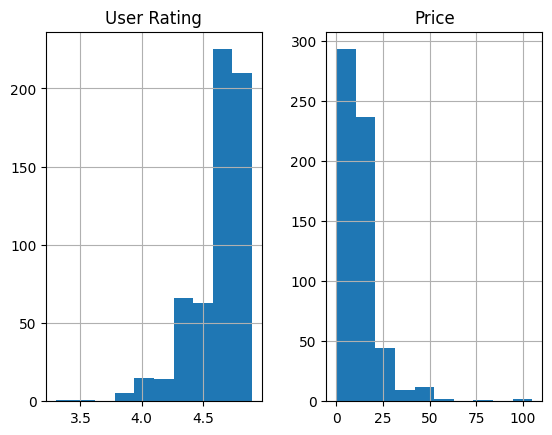

In [10]:
df[["User Rating", "Price"]].hist()

In [11]:
#new dataframe x ony contain the books with user rating 4.9
x=df[df["User Rating"]==4.9]
x.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


<Axes: ylabel='Name'>

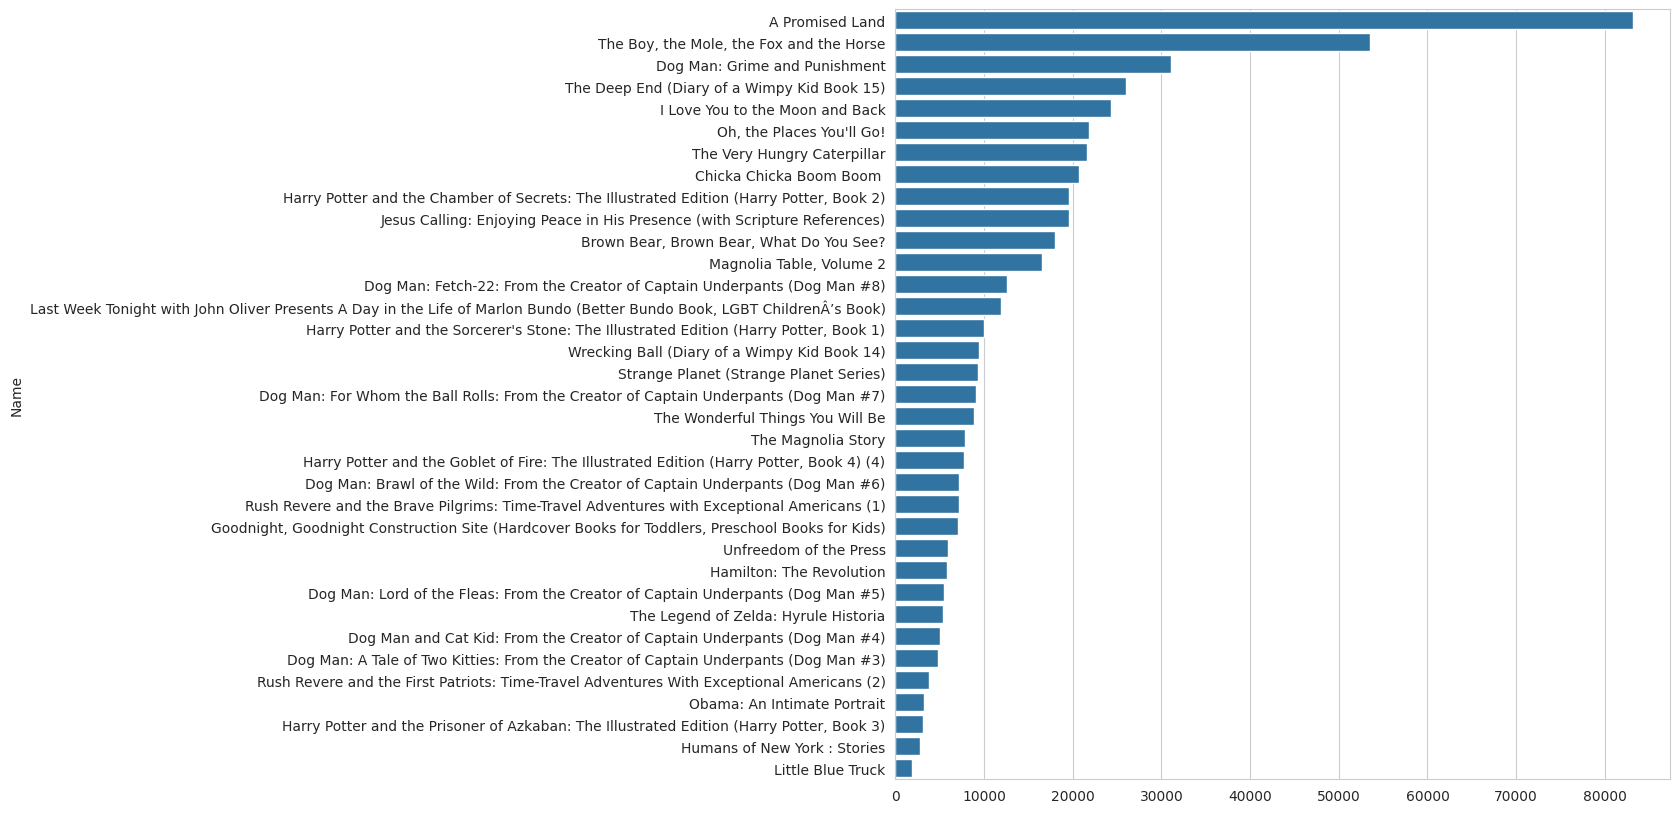

In [12]:
#output will be the books name with the mean reviews with the rating of 4.9(the dataframe x contains that)
y = x.groupby("Name").Reviews.mean().sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.barplot(x=y.values, y=y.index)

<Axes: xlabel='User Rating', ylabel='Reviews'>

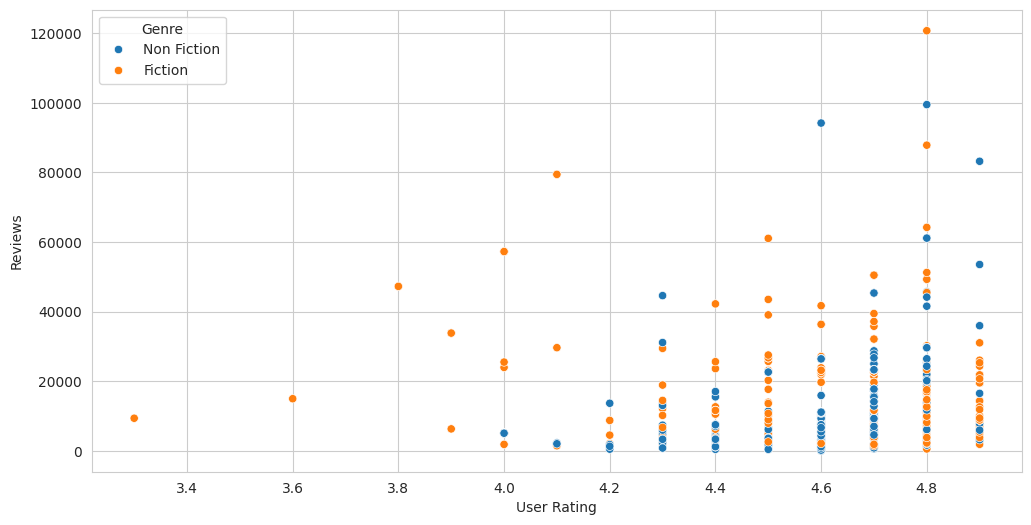

In [13]:
#user rating and reviews relation
plt.figure(figsize=(12,6))
sns.scatterplot(x="User Rating", y="Reviews", data=df, hue="Genre")

above the outliers are the points which stand away from the scatter-block

<Axes: xlabel='User Rating', ylabel='Price'>

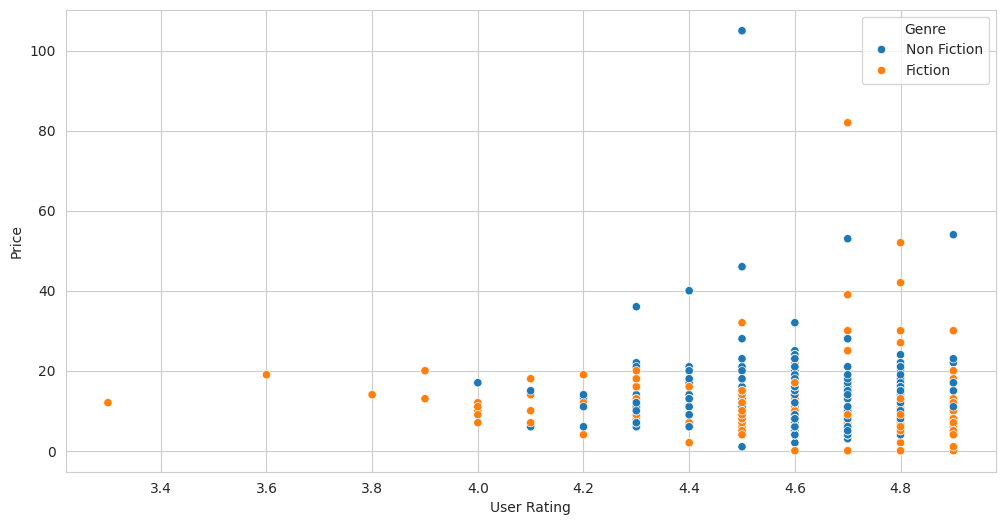

In [14]:
#user rating and prize realtion
plt.figure(figsize=(12,6))
sns.scatterplot(x="User Rating",y="Price",data=df,hue="Genre")

<Axes: xlabel='Year', ylabel='Reviews'>

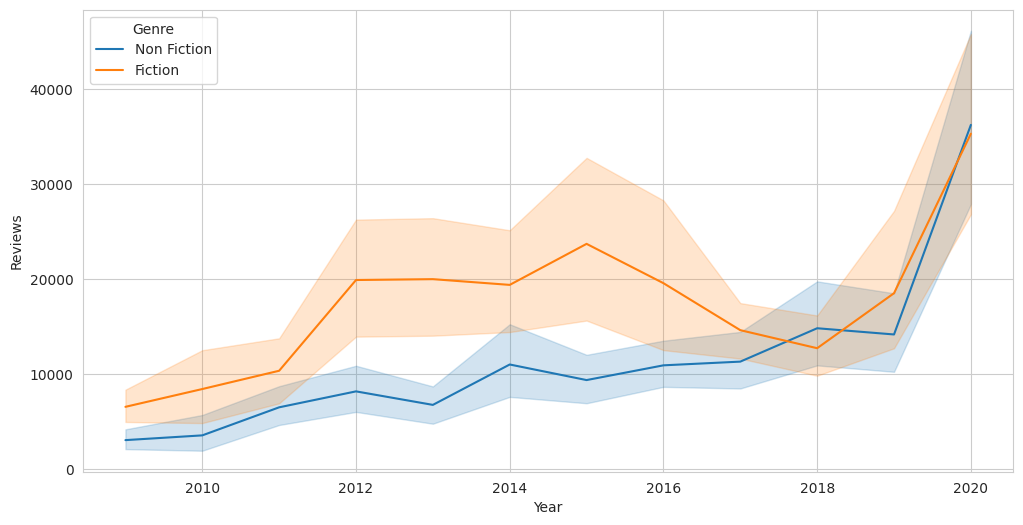

In [15]:
#reviews over the year
plt.figure(figsize=(12,6))
sns.lineplot(x="Year",y="Reviews",data=df,hue="Genre")

above the highlight around the line is the upper and lower limits of the feature

<Axes: xlabel='Year', ylabel='Price'>

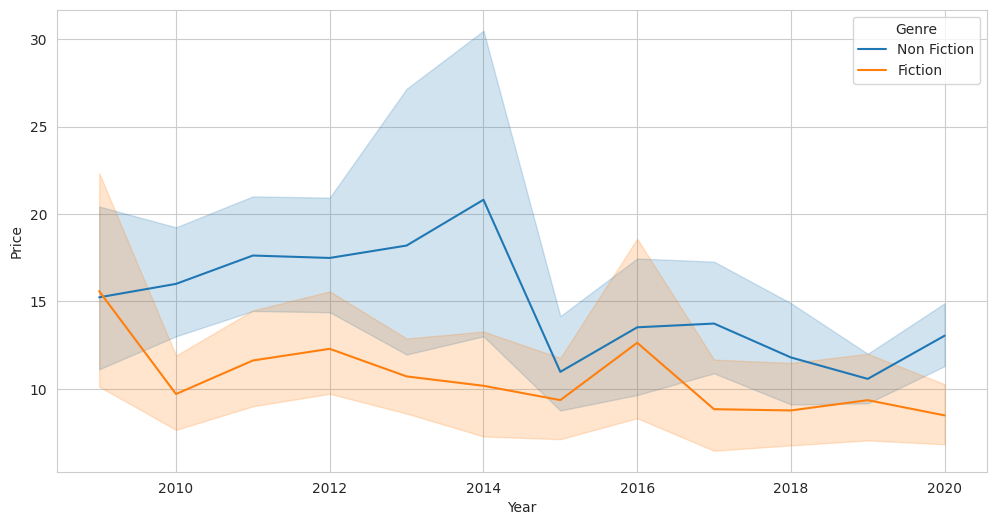

In [16]:
#Price over the year
plt.figure(figsize=(12,6))
sns.lineplot(x="Year",y="Price",data=df,hue="Genre")

In [17]:
df['Author'].value_counts()

,count
Author,
Jeff Kinney,13
Suzanne Collins,12
Gary Chapman,12
Rick Riordan,11
American Psychological Association,10
...,...
Ibram X. Kendi,1
Don Miguel Ruiz,1
Jennie Allen,1


In [20]:
#best selling books authors
#Sort authors by how many Names (books/items) they have& saving in temp_df1
temp_df1 = df.groupby('Author').count().reset_index().sort_values('Name',ascending=False).head(10)

In [22]:
import plotly.graph_objects as go

In [25]:
top = go.Bar(
    x=temp_df1['Author'],
    y=temp_df1['Name'],
    marker=dict(
        color='blue',
        line=dict(color='rgba(0,0,0)', width=1.5)
    )
)

layout = go.Layout(
    template="plotly_white",
    title="Top 10 Best-selling Authors",
    xaxis=dict(title='Author', tickangle=45),
    yaxis=dict(title='Count')
)

fig = go.Figure(data=[top], layout=layout)
fig.show()


In [34]:
#based on mean of reviews
temp_df2 = (
    df.groupby('Author')['Reviews']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
      .head(10)
)


In [35]:
temp_df2.head()

,Author,Reviews
0,Delia Owens,104284.000000
1,Mary L. Trump Ph.D.,94196.000000
2,Barack Obama,83212.000000
3,Paula Hawkins,79446.000000
4,Michelle Obama,73921.333333


In [36]:
top = go.Bar(
    x=temp_df2['Author'],
    y=temp_df2['Reviews'],
    marker=dict(
        color='yellow',
        line=dict(color='rgba(0,0,0)', width=1)
    )
)

layout = go.Layout(
    template="plotly_white",
    title="Authors with highest Reviews",
    xaxis=dict(title='Author', tickangle=45),
    yaxis=dict(title='Mean')
)

fig = go.Figure(data=[top], layout=layout)
fig.show()


In [39]:
df2 = (
    df.groupby('Author')['Reviews']
      .mean()
      .sort_values(ascending=False)
      .reset_index()
      .head(10)
)

In [41]:
fig = px.scatter(df2, x='Author', y='Reviews', color='Author')
fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGray')),
                  selector=dict(mode='markers'))
fig.show()

## **WORD CLOUD**

In [43]:
fiction = df[df['Genre']=='Fiction']
fiction.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
13,A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction


In [45]:
non_fiction=df[df['Genre']=='Non Fiction']
non_fiction.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction


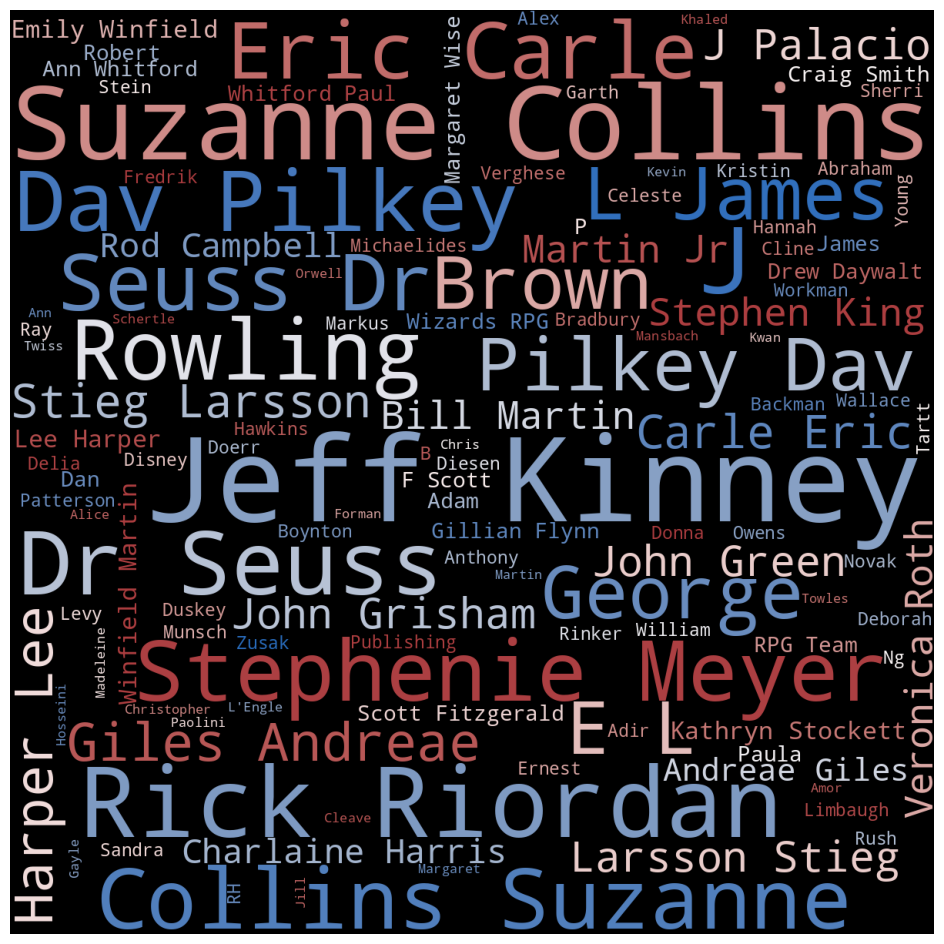

In [47]:
from wordcloud import WordCloud
text =' '.join(fiction['Author'])
plt.rcParams['figure.figsize']=(12,12)
wordcloud=WordCloud(background_color='black', colormap='vlag',
                    width=1200,height=1200,max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

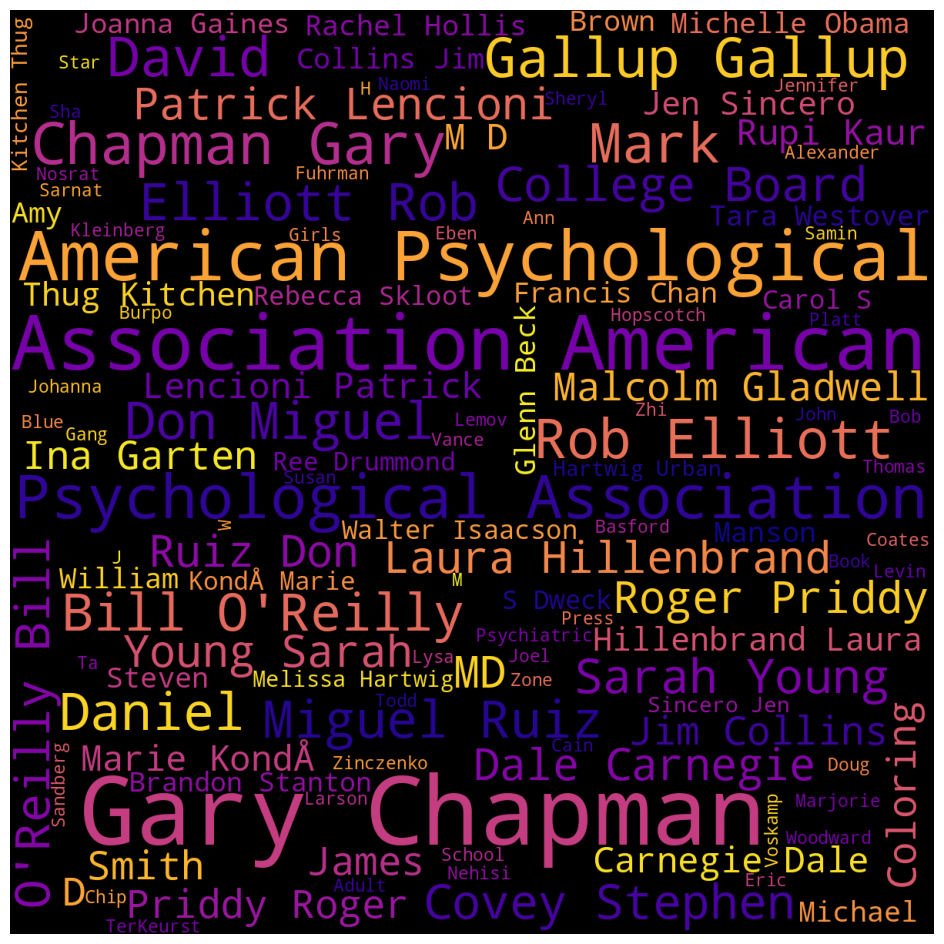

In [57]:
from string import whitespace
from wordcloud import WordCloud
text=' '.join(non_fiction['Author'])
plt.rcParams['figure.figsize']=(12,12)
wordcloud=WordCloud(background_color='black',colormap='plasma',
                    width=1200,height=1200,max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()